<a href="https://colab.research.google.com/github/GabiHan/ML-Suicide-Analysis/blob/main/index1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [26]:
df = pd.read_csv('/content/social-media-impact-on-suicide-rates.csv')
print(df.to_string())

    year   sex           S          ST          SF
0   2010  BTSX  100.000000  100.000000  100.000000
1   2010  FMLE  100.000000  100.000000  100.000000
2   2010   MLE  100.000000  100.000000  100.000000
3   2011  BTSX   98.681894  216.666667  138.980263
4   2011  FMLE   98.183773  216.666667  138.980263
5   2011   MLE   98.795530  216.666667  138.980263
6   2012  BTSX   98.595123  342.592593  173.684211
7   2012  FMLE   97.653750  342.592593  173.684211
8   2012   MLE   98.857511  342.592593  173.684211
9   2013  BTSX   97.119135  446.296296  201.973684
10  2013  FMLE   95.672700  446.296296  201.973684
11  2013   MLE   97.517070  446.296296  201.973684
12  2014  BTSX   95.848213  533.333333  229.111842
13  2014  FMLE   94.606231  533.333333  229.111842
14  2014   MLE   96.154775  533.333333  229.111842
15  2015  BTSX   94.177492  564.814815  261.677632
16  2015  FMLE   93.219199  564.814815  261.677632
17  2015   MLE   94.350025  564.814815  261.677632
18  2016  BTSX   91.676469  588

In [27]:
#S is suicide rate change by % since 2010
#ST is suicide rate change by % since 2010 for Twitter users
#SF is suicide rate change by % since 2010 for Facebook users
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    30 non-null     int64  
 1   sex     30 non-null     object 
 2   S       30 non-null     float64
 3   ST      30 non-null     float64
 4   SF      30 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ KB
None


In [28]:
#cleaning the dataframe
new_df = df.dropna()
print(new_df.to_string())

    year   sex           S          ST          SF
0   2010  BTSX  100.000000  100.000000  100.000000
1   2010  FMLE  100.000000  100.000000  100.000000
2   2010   MLE  100.000000  100.000000  100.000000
3   2011  BTSX   98.681894  216.666667  138.980263
4   2011  FMLE   98.183773  216.666667  138.980263
5   2011   MLE   98.795530  216.666667  138.980263
6   2012  BTSX   98.595123  342.592593  173.684211
7   2012  FMLE   97.653750  342.592593  173.684211
8   2012   MLE   98.857511  342.592593  173.684211
9   2013  BTSX   97.119135  446.296296  201.973684
10  2013  FMLE   95.672700  446.296296  201.973684
11  2013   MLE   97.517070  446.296296  201.973684
12  2014  BTSX   95.848213  533.333333  229.111842
13  2014  FMLE   94.606231  533.333333  229.111842
14  2014   MLE   96.154775  533.333333  229.111842
15  2015  BTSX   94.177492  564.814815  261.677632
16  2015  FMLE   93.219199  564.814815  261.677632
17  2015   MLE   94.350025  564.814815  261.677632
18  2016  BTSX   91.676469  588

In [29]:
#check out for duplicates data
print(df.duplicated())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool


In [70]:
reg = linear_model.LinearRegression()
reg.fit(df[['year']],df.S)

LinearRegression()

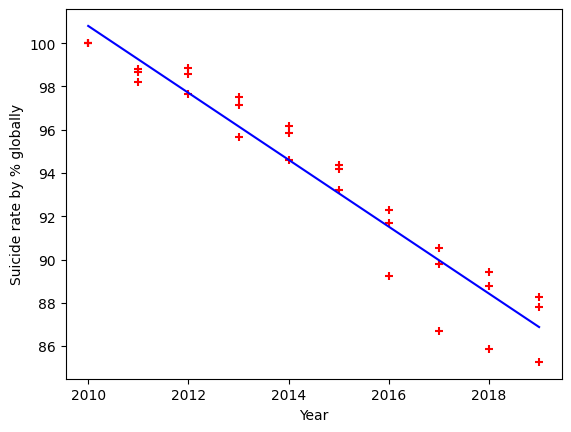

In [71]:
#show the evolution rate of suicide per year
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Suicide rate by % globally')
plt.scatter(df.year, df.S, color= 'red', marker='+')

#linear regression
plt.plot(df.year, reg.predict(df[['year']]), color='blue')

In [60]:
reg.predict([[2020]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([85.33351926])

In [55]:
#check a and b from y=ax+b
reg.coef_


array([-1.5461373])

In [56]:
reg.intercept_

3208.5308559488867

In [59]:
#Visualisation of how the .predict works
a= reg.coef_
x=2013
b=reg.intercept_
y=a*x+b
print(y)

[96.15648033]


In [75]:
#Find the linear regression for Facebook users suicide rate
reg.fit(df[['year']],df.SF)

LinearRegression()

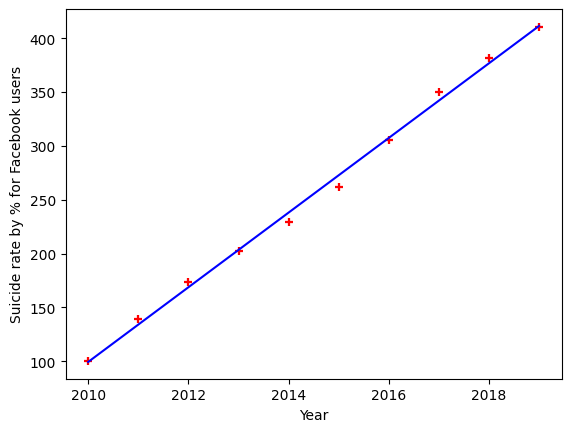

In [76]:
#for facebook users
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Suicide rate by % for Facebook users')
plt.scatter(df.year, df.SF, color= 'red', marker='+')

#linear regression for facebook users
plt.plot(df.year, reg.predict(df[['year']]), color='blue')

In [48]:
reg.predict([[2013]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([203.37021531])

In [77]:
#Find the linear regression for Twitter users suicide rate
reg.fit(df[['year']],df.ST)

LinearRegression()

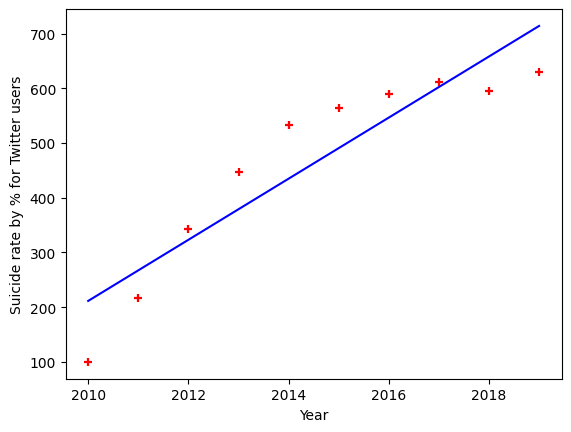

In [78]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Suicide rate by % for Twitter users')
plt.scatter(df.year, df.ST, color= 'red', marker='+')

plt.plot(df.year, reg.predict(df[['year']]), color='blue')